In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [3]:
dataset = pd.read_csv('LogisticRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]))

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
len(X_train), len(X_test), len(X)

(16, 4, 20)

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [11]:
classifier.predict([[6], [4]])


array([1, 0])

In [10]:
classifier.predict_proba([[6], [4]])


array([[0.62497682, 0.37502318]])

In [34]:
y_pred = classifier.predict(X_test)
print(X_test, classifier.predict(X_test))
print('')
print(X_test, classifier.predict_proba(X_test))
#8.6시간 공부했을 때 불합격 확률 / 합격 확률


[[ 8.6]
 [ 1.2]
 [10. ]
 [ 4.5]] [1 0 1 1]

[[ 8.6]
 [ 1.2]
 [10. ]
 [ 4.5]] [[0.00807474 0.99192526]
 [0.97702222 0.02297778]
 [0.001609   0.998391  ]
 [0.48307854 0.51692146]]


In [20]:
y_test

array([1, 0, 1, 0])

In [21]:
classifier.score(X_test, y_test)

0.75

In [22]:
X_range = np.arange(min(X), max(X), 0.1)
X_range

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [24]:
classifier.coef_ # y=mx + b 에서 m (1 / 1+e^-y) 


array([[1.15687683]])

In [25]:
classifier.intercept_ 

array([-5.13823405])

In [37]:
from sklearn.metrics import confusion_matrix #6주차 19p 예측과 실제값 갯수
cm = confusion_matrix(y_test, y_pred) #혼돈행렬
cm

array([[1, 1],
       [0, 2]])

In [26]:
 #p = 1 / (1 + np.exp(-y)) # y = mx + b
 p = 1 / (1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_))) # y = mx + b
 p

array([[0.01035583, 0.01161118, 0.0130167 , 0.01458984, 0.01634996,
        0.01831847, 0.02051904, 0.02297778, 0.0257234 , 0.02878743,
        0.03220437, 0.03601184, 0.04025075, 0.04496534, 0.05020326,
        0.05601555, 0.06245651, 0.06958349, 0.07745655, 0.08613794,
        0.09569142, 0.10618136, 0.1176716 , 0.13022408, 0.14389721,
        0.15874395, 0.17480973, 0.19213011, 0.21072838, 0.23061305,
        0.25177552, 0.27418791, 0.29780133, 0.32254464, 0.348324  ,
        0.37502318, 0.40250484, 0.43061281, 0.45917517, 0.4880083 ,
        0.51692146, 0.54572176, 0.57421932, 0.60223222, 0.62959096,
        0.65614237, 0.6817526 , 0.70630918, 0.72972211, 0.75192414,
        0.77287004, 0.79253536, 0.81091459, 0.82801892, 0.84387392,
        0.858517  , 0.87199503, 0.88436205, 0.89567719, 0.90600282,
        0.91540298, 0.923942  , 0.93168343, 0.9386892 , 0.94501893,
        0.95072949, 0.95587461, 0.96050477, 0.96466704, 0.96840509,
        0.97175925, 0.97476661, 0.97746114, 0.97

In [17]:
p.shape, X_range.shape

((1, 95), (95,))

In [24]:
p = p.reshape(-1)
p, p.shape

(array([0.01035583, 0.01161118, 0.0130167 , 0.01458984, 0.01634996,
        0.01831847, 0.02051904, 0.02297778, 0.0257234 , 0.02878743,
        0.03220437, 0.03601184, 0.04025075, 0.04496534, 0.05020326,
        0.05601555, 0.06245651, 0.06958349, 0.07745655, 0.08613794,
        0.09569142, 0.10618136, 0.1176716 , 0.13022408, 0.14389721,
        0.15874395, 0.17480973, 0.19213011, 0.21072838, 0.23061305,
        0.25177552, 0.27418791, 0.29780133, 0.32254464, 0.348324  ,
        0.37502318, 0.40250484, 0.43061281, 0.45917517, 0.4880083 ,
        0.51692146, 0.54572176, 0.57421932, 0.60223222, 0.62959096,
        0.65614237, 0.6817526 , 0.70630918, 0.72972211, 0.75192414,
        0.77287004, 0.79253536, 0.81091459, 0.82801892, 0.84387392,
        0.858517  , 0.87199503, 0.88436205, 0.89567719, 0.90600282,
        0.91540298, 0.923942  , 0.93168343, 0.9386892 , 0.94501893,
        0.95072949, 0.95587461, 0.96050477, 0.96466704, 0.96840509,
        0.97175925, 0.97476661, 0.97746114, 0.97

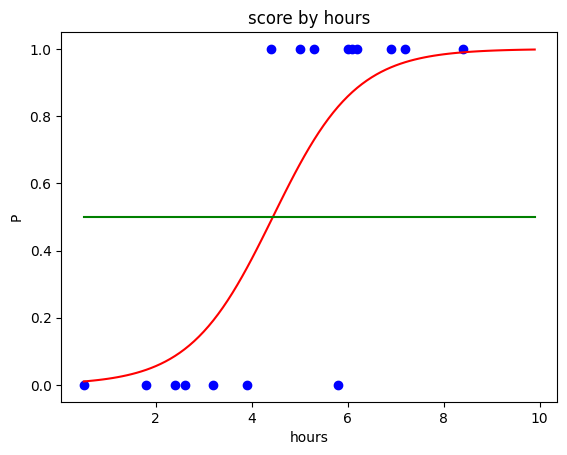

In [29]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_range, p, color = 'red')
plt.plot(X_range, np.full(len(X_range), 0.5), color = 'green')
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

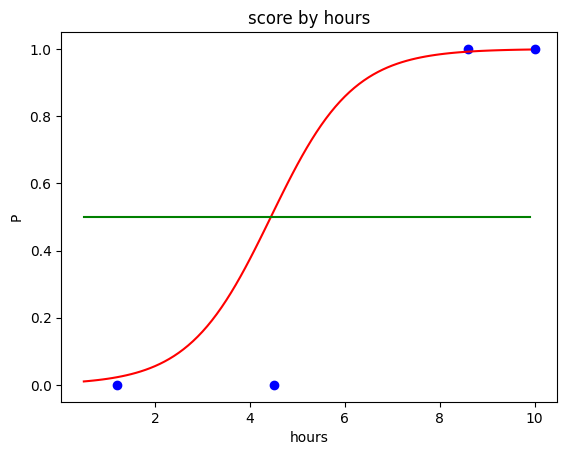

In [27]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_range, p, color = 'red')
plt.plot(X_range, np.full(len(X_range), 0.5), color = 'green')
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

In [30]:
classifier.predict_proba([[4.5]])

array([[0.48307854, 0.51692146]])

confusion matrix

TN : 불합격(예측) >> 불합격(실제)
FP : 합격(예측)   >> 불합격(실제)
FN : 불합격(예측) >> 합격(실제)
TP : 합격(예측)   >> 합격(실제)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 1],
       [0, 2]], dtype=int64)